In [1]:
import networkx as nx
import numpy as np

Independent cascade model
---

In [2]:
def propagate_neighbours(graph:nx.Graph, new_active, p, seed=None):
    if seed:
        np.random.seed(seed)
        
    # Get all neightbors
    neighbors = []
    for node in new_active:
        neighbors += g.neighbors(node)
    neighbors = list(set(neighbors)) # Keep unique neighbors
    
    # Put the weight sum for each neighbor
    neighbors_count = {n:0 for n in neighbors}
    for u, v, w in graph.edges.data():
        if u in new_active:
            w = w.get("weight", 1)
            neighbors_count[v] += w

    
    # Get the probability for each node 
    neighbors_prob = list(neighbors_count.values())
    sum_prob = sum(neighbors_prob)
    if sum_prob > 0:
        neighbors_prob = [raw_prob / sum_prob for raw_prob in neighbors_prob]# Normalise
    
    activation = np.random.uniform(0, 1, size=len(neighbors))
    activation = neighbors_prob*activation < p
    
    activated_neighbors = list(np.extract(activation, neighbors))
    
    return activated_neighbors

def independent_cascade_model(graph:nx.Graph, activated_nodes, p=.2, seed=None):
    new_active = activated_nodes[:]
    list_active = activated_nodes[:]
    while new_active:
        activated_neighbors = propagate_neighbours(graph, new_active, p=p, seed=seed)
        new_active = list(set(activated_neighbors) - set(list_active))
        list_active  += new_active
    
    spread = len(list_active)

    return {'spread':spread, 'list_active':list_active}


{'spread': 13, 'list_active': [16, 5, 6, 0, 4, 11, 21, 1, 13, 2, 3, 12, 28]}


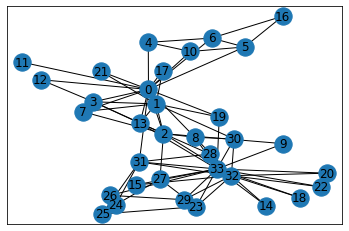

In [3]:
g = nx.karate_club_graph()
nx.draw_networkx(g)
info_icm = independent_cascade_model(g, [16], p=.018)

print(info_icm)

